In [15]:
# Визначте функції AND, OR та XOR
def AND(x1, x2):
    return 1 if x1 == 1 and x2 == 1 else 0

def OR(x1, x2):
    return 1 if x1 == 1 or x2 == 1 else 0

def XOR(x1, x2):
    y1 = OR(x1, x2)     # функція OR
    y2 = AND(x1, x2)    # функція AND

    return AND(y1, 1 - y2)  # Логіка XOR з виходами OR і NOT AND

# тест функції XORЛабораторна робота №2Лабораторна робота №2
test_cases = [(0, 0), (0, 10), (1, -0), (1, -1)]
print("XOR Gate Results:")
for x1, x2 in test_cases:
    print(f"XOR({x1}, {x2}) = {XOR(x1, x2)}")


XOR Gate Results:
XOR(0, 0) = 0
XOR(0, 10) = 0
XOR(1, 0) = 1
XOR(1, -1) = 1


Тестування двошарового персептрону для XOR:
XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


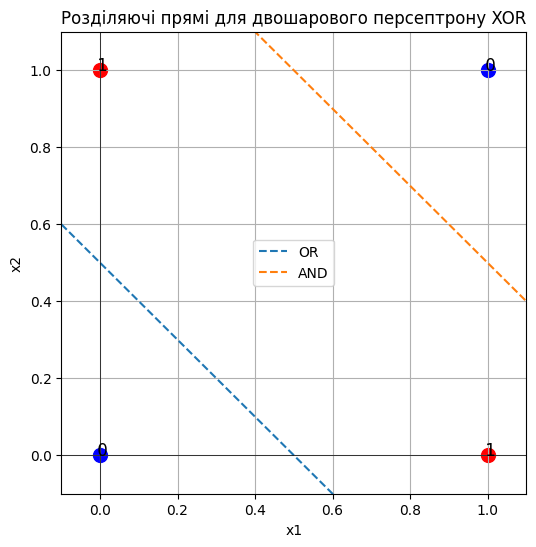

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Вхідні дані для XOR і цільові значення
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Функція активації - порогова
def step_function(x):
    return 1 if x >= 0 else 0

# Перший шар: функції OR та AND
def layer1(x):
    w_OR, b_OR = np.array([1, 1]), -0.5  # Параметри для OR
    w_AND, b_AND = np.array([1, 1]), -1.5  # Параметри для AND
    y1 = step_function(np.dot(w_OR, x) + b_OR)  # OR
    y2 = step_function(np.dot(w_AND, x) + b_AND)  # AND
    return np.array([y1, y2])

# Другий шар: обчислення XOR на основі OR та AND
def layer2(h):
    w_XOR, b_XOR = np.array([1, -1]), -0.5
    return step_function(np.dot(w_XOR, h) + b_XOR)

# Функція XOR, що використовує двошаровий персептрон
def xor_perceptron(x):
    h = layer1(x)  # Перший шар
    return layer2(h)  # Другий шар

# Тестування для кожної комбінації вхідних значень
print("Тестування двошарового персептрону для XOR:")
for x in X:
    print(f"XOR({x[0]}, {x[1]}) = {xor_perceptron(x)}")

# Візуалізація розділяючих прямих
plt.figure(figsize=(6,6))
for idx, point in enumerate(X):
    plt.scatter(point[0], point[1], c='r' if y[idx] == 1 else 'b', s=100)
    plt.text(point[0], point[1], f" {y[idx]}", fontsize=12, ha='center')

# Побудова рішучих ліній
x_vals = np.linspace(-0.1, 1.1, 100)
y_or = 0.5 - x_vals  # Лінія OR
y_and = 1.5 - x_vals  # Лінія AND

plt.plot(x_vals, y_or, '--', label='OR')
plt.plot(x_vals, y_and, '--', label='AND')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.title("Розділяючі прямі для двошарового персептрону XOR")
plt.grid(True)
plt.show()
